# **PyTorch & (by hand) gradient descent**

**Disclaimer**: large parts of the lab are taken from [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) by [Soumith Chintala](http://soumith.ch/) and lectures material of [Sebastian Goldt](https://datascience.sissa.it/research-unit/12/theory-of-neural-networks).

# **Neural Network: an intuitive definition**

Neural networks (NNs) are nested functions over some input data. The functions are defined by weights and biases (in tensor form), the _trainable parameters_.

The training of a NN is made by two phases:

**Forward Propagation**: the NN makes _a prediction_ and does its best to guess the output by means of the nested functions.

**Backward Propagation**: the NN optimizes the parameters trying to lower the _loss_. To do that, it starts from the output and goes _backwards_, computing the derivatives (the _gradients_) of the loss with
respect to the trainable parameters and optimizing them by means of gradient descent. If you want to deepen your knowledge, check [this video](https://www.youtube.com/watch?v=tIeHLnjs5U8) out.

# **Gradient Descent by hand**

We want to understand if a number is even or odd. To do so, we take a datset of numbers and we apply gradient descent method to a set of data.

The gradient descent is the way my Neural Network _optimizes_ the parameters. 

Imagine to have $m$ data and we want to optimize the parameters of the net minimizing the following _mean square error_ loss:

$$
L = \frac{1}{m}\sum_i^m (y_i - y^{nn}_i)^2
$$

where $\displaystyle y^{nn}_i = w \cdot x_i + b$. The gradient descent algorithm is based on the idea that the _faster_ way to reach a minimum is to follow the negative gradient of the quantity we want to minimize.

We need:
$$
\frac{\partial L}{\partial w} \quad \text{ and } \quad \frac{\partial L}{\partial b}. 
$$

In the specific case of the mean square error we have:
$$
\frac{\partial L}{\partial w} = \frac{2}{m}\sum_i^m x_i(y_i -  w \cdot x_i + b),
$$
while 
$$
\frac{\partial L}{\partial b} = \frac{2}{m}\sum_i^m (y_i -  w \cdot x_i + b).
$$

The new parameter are, given a _learning rate_ $\lambda$:

$$
w = w - \lambda \frac{\partial L}{\partial w} 
\quad \text{ and } \quad 
b = b - \lambda \frac{\partial L}{\partial b}.
$$


















In [ ]:
num_samples = {"train": 2000, "test": 5000}

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np

In [ ]:
modes = ["train", "test"]

#### input = hand-written digits 28x28, output = the number

datasets = {"train": datasets.MNIST("~/datasets/mnist", 
                                   train=True,
                                   download=True),
           "test": datasets.MNIST("~/datasets/mnist", 
                              train=False,
                              download=True)}

**Dataset**: MNIST images. The MNIST dataset contains 28x28 grayscale images of handwritten digits from 0 to 9. The training set has 60,000 samples, the test set has 10,000 samples. The output is an interger label from 0 to 9.

In [ ]:
xs = dict()
ys = dict()

for mode in modes:
    xs[mode] = datasets[mode].data[:num_samples[mode]].float()
    ys[mode] = datasets[mode].targets[:num_samples[mode]].float()
    
    mean, std = (torch.mean(xs[mode]), torch.std(xs[mode]))
    xs[mode] = (xs[mode] - mean) / std
    ys[mode] = 2 * torch.fmod(ys[mode], 2) - 1

**Question time!!!** What does the above code? Why is it important?

**Answer:** ....


**Inside the data**

In [ ]:
import matplotlib.pyplot as plt

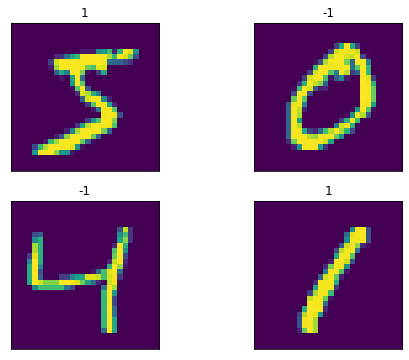

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

plt_idx = 0
for (n_row, n_col), axes in np.ndenumerate(ax):
    axes.imshow(xs["train"][plt_idx])
    axes.set_title("%d" % ys["train"][plt_idx])
    
    axes.set_xticks([])
    axes.set_yticks([])
    
    plt_idx += 1
plt.show()

# **Your turn :)**

Let us have fun! What about implementing the gradient descent algorithm?

In [ ]:
import math

In [ ]:
xs["train"].shape

torch.Size([2000, 28, 28])

In [ ]:
ys["train"].shape
print(ys["train"][0])

tensor(1.)


In [ ]:
xs["train"] = torch.reshape(xs["train"], (num_samples["train"], xs["train"].shape[1]*xs["train"].shape[1]))


In [ ]:
print(xs["train"].shape[1])
print(xs["train"].shape[0])

784
2000


In [ ]:
xs["test"] = torch.reshape(xs["test"], (num_samples["test"], xs["test"].shape[1]*xs["test"].shape[1]))


In [ ]:
print(xs["test"].shape[1])
print(xs["test"].shape[0])

784
5000


In [ ]:
x_train = xs['train']
y_train = ys['train']
x_test = xs['test']
y_test = ys['test']
w = torch.rand(x_train.shape[1], requires_grad=True)
b = torch.rand(1)

First of all, define the loss function!

In [ ]:
def  loss(w,b,X,y):
    
    
    m = ...
    
    predictions = ...
    my_loss = ....
    return my_loss

Now define the gradient descent algorithm and save how the loss goes for train and test

In [ ]:
#### errors dict of "train" and "test"

def gradient_descent(X,y,w,b,errors=None,learning_rate=0.01,epochs=100):
    m =  ...
    for it in range(epochs):
        
        w_d = ... # derivative of the loss with respect to w
        w = ... # update the weight 
        b_d = ... # derivative of the loss with respect to b
        b = ... # update the bias
        
        if errors:
            for mode in modes:
                errors[mode] += [loss(w,b,xs[mode],ys[mode]).item()]
              
    return w, b, errors
        

In [ ]:
#### initialize the data ####

### If you want you can fix the seed...

w = torch.rand(x_train.shape[1], requires_grad=True)
b = torch.rand(1, requires_grad=True)
err = {"train": [], "test": []}
lr =0.0001
epochs = 150

In [ ]:
w, b, errors = gradient_descent(x_train,y_train,w,b,err,lr,epochs)


Let us make a plot!

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(errors["train"], label="Training")
ax.semilogy(errors["test"], label="Testing")
ax.legend()
ax.set_title("Loss MNIST\n ($N=%d, \lambda=%g$)" % (epochs, lr))
ax.set_xlabel("step")
ax.set_ylabel("mse")
# ax.set_xscale("log")
ax.set_ylim(bottom=0)
plt.show()

# **An introduction to ``torch.autograd``**

``torch.autograd`` is the way PyTorch computes derivatives. It is the _automatic differentiation_ tool of the
neural network.

**How does it work?**: let us create to tensors ``a`` and ``b`` with
``requires_grad=True``. The latter option tells ``autograd`` to track every operation on the tensors (useful on back propagation, where you do not want to forget any information). Moreover, let us define the tensot ``T`` as

$$ T = a^3 - 2b^2.$$



In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
T = a**3 - 2*b**2

In this silly example, the tensors ``a`` and ``b`` are the trainable parameters of an NN, while ``T`` is the _loss_ we want to minimize. In a backward training, we want to compute

$$\frac{\partial T}{\partial a} = 3a^2 \text{ and } \frac{\partial T}{\partial b} = -4b.$$

In the implementation we _need to explicit_ our goal: i.e. compute derivative of ``T``. To do so, we call ``.backward()`` on ``T``: in this way autograd computes the gradients with respect to the parameters and stores them in the ``.grad`` attribute of the tensor, in our case, ``a.grad`` and ``b.grad``.

**Be careful**: we have to pass a ``gradient`` argument in ``T.backward()`` when dealing with vectors. The derivative of ``T`` with respect to ``T`` ia a ``T``-shaped tensor and verifies
$$\frac{dT}{dT} = 1$$

The function ``.backward`` applies without arguments to scalar functions (mean square errors, for example). To do so, we can aggragate all the information of ``T`` summing its elements and, only then, calling the ``.backward`` function: ``T.sum().backward()``.

In [ ]:
external_grad = torch.tensor([1., 1.])
T.backward(gradient=external_grad)
# T.sum().backward()



In [ ]:
# check if collected gradients are correct
print(3*a**2 == a.grad)
print(-4*b == b.grad)

# **Your turn :)**

Can you implement gradient descend with ``.autograd``?

In [ ]:
def  loss(w,b,X,y):
    
    
    m = ...
    
    predictions = ...
    my_loss = ...
    return my_loss

In [ ]:
def auto_gradient_descent(X,y,w,b,errors=None,learning_rate=0.01,epochs=100):
    m =  ...
    for it in range(epochs):
        my_loss = loss(w,b,X,y)
        my_loss.backward()
        
        with torch.no_grad(): # do note trace once again 
            w = ... #update w
            b = ... # update p
            w.requires_grad_(True)
            b.requires_grad_(True) 

        w.grad = None
        b.grad = None
    
        with torch.no_grad():
            if errors:
                for mode in modes:
                    errors[mode] += [loss(w,b,xs[mode],ys[mode]).item()]

    return w, b, errors

In [ ]:
#### initialize the data ####
w = torch.rand(x_train.shape[1], requires_grad=True)
b = torch.rand(1, requires_grad=True)
err = {"train": [], "test": []}
lr =0.001
epochs = 500


In [ ]:
w, b, errors = auto_gradient_descent(x_train,y_train,w,b,err,lr,epochs)

In [ ]:
fig, ax = plt.subplots()
ax.plot(errors["train"], label="Training")
ax.plot(errors["test"], label="Testing")
ax.legend()
ax.set_title("Loss on MNIST\n ($N=%d, \lambda=%g$)" % (epochs, lr))
ax.set_xlabel("step")
ax.set_ylabel("mse")
ax.set_yscale("log")
ax.set_ylim(bottom=0)
plt.show()